In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import os

# Set plot style
sns.set_style('whitegrid')

In [21]:
# Install the Kaggle library
!pip install -q kaggle

# Use Colab's file uploader
from google.colab import files
print("Please upload the kaggle.json file you downloaded from your Kaggle account.")
files.upload()

# Create a directory for the Kaggle API configuration
!mkdir -p ~/.kaggle
# Move the uploaded kaggle.json to the required directory
!cp kaggle.json ~/.kaggle/
# Set the correct permissions for the file
!chmod 600 ~/.kaggle/kaggle.json

print("\nKaggle API configured successfully.")

Please upload the kaggle.json file you downloaded from your Kaggle account.


Saving archive.zip to archive.zip

Kaggle API configured successfully.


In [23]:
# Unzip the uploaded archive.zip file
!unzip -q archive.zip

print("\nDataset extracted successfully.")


Dataset extracted successfully.


In [25]:
# Check what files were extracted
!ls -la

total 3184
drwxr-xr-x 1 root root    4096 Jan 31 11:09  .
drwxr-xr-x 1 root root    4096 Jan 31 08:58  ..
-rw-r--r-- 1 root root  442471 Jan 31 11:03  archive.zip
drwxr-xr-x 4 root root    4096 Jan 16 14:24  .config
-rw-r--r-- 1 root root  526795 Oct  4  2019  data.csv
-rw-r--r-- 1 root root 1721295 Oct  4  2019  data.dat
-rw-r--r-- 1 root root      68 Jan 31 09:26 'kaggle (1).json'
-rw-r--r-- 1 root root      68 Jan 31 09:40 'kaggle (2).json'
-rw-r--r-- 1 root root      68 Jan 31 10:47 'kaggle (3).json'
-rw-r--r-- 1 root root      68 Jan 31 09:00  kaggle.json
-rw-r--r-- 1 root root  526795 Oct  4  2019  output.csv
drwxr-xr-x 1 root root    4096 Jan 16 14:24  sample_data


In [26]:
# Now, load the data from the unzipped CSV files
# Using data.csv as the main dataset
data_df = pd.read_csv('data.csv')

# Display the shape and first few rows
print(f"Dataset shape: {data_df.shape}")
print("\nFirst few rows:")
print(data_df.head())

# Check if there's a 'SalePrice' column (target variable)
if 'SalePrice' in data_df.columns:
    print("\nSalePrice column found - this appears to be training data")
else:
    print("\nNo SalePrice column - checking structure...")

print("\nColumn names:")
print(data_df.columns.tolist())

Dataset shape: (4600, 18)

First few rows:
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976

In [28]:
# Load the complete dataset
data_df = pd.read_csv('data.csv')

# The target variable is 'price', not 'SalePrice'
# We'll split this into train and test sets later

print(f"Dataset shape: {data_df.shape}")
print(f"\nFirst few rows:")
print(data_df.head())

# Separate features and target
X = data_df.drop('price', axis=1)
y = data_df['price']

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

print("Data loaded successfully!")

Dataset shape: (4600, 18)

First few rows:
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976

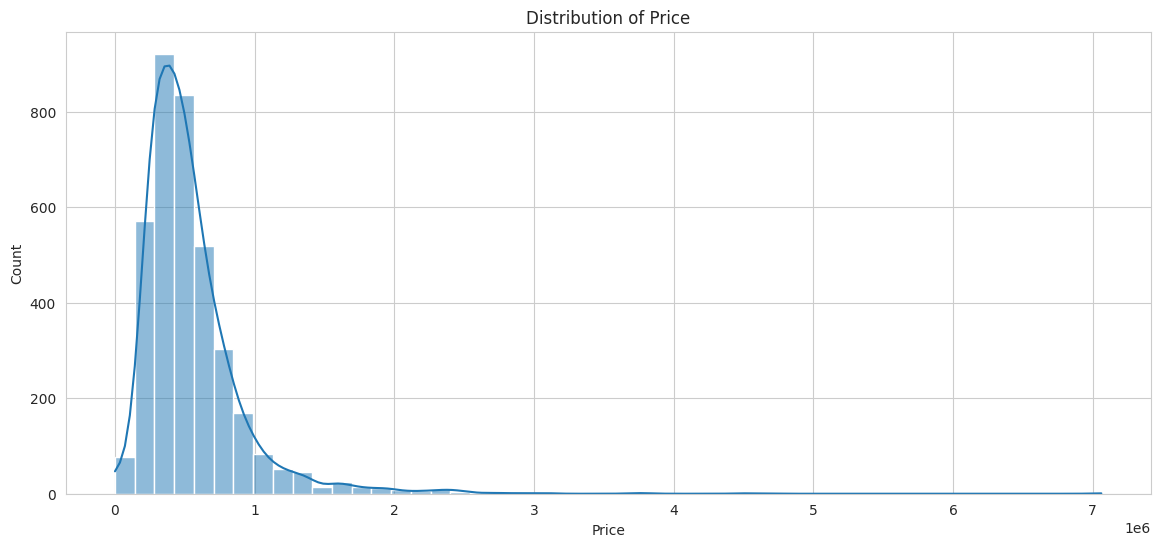

Skewness of Price: 4.132379138106879


In [32]:
plt.figure(figsize=(14, 6))
sns.histplot(y_train, kde=True, bins=50)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.show()

print(f"Skewness of Price: {y_train.skew()}")

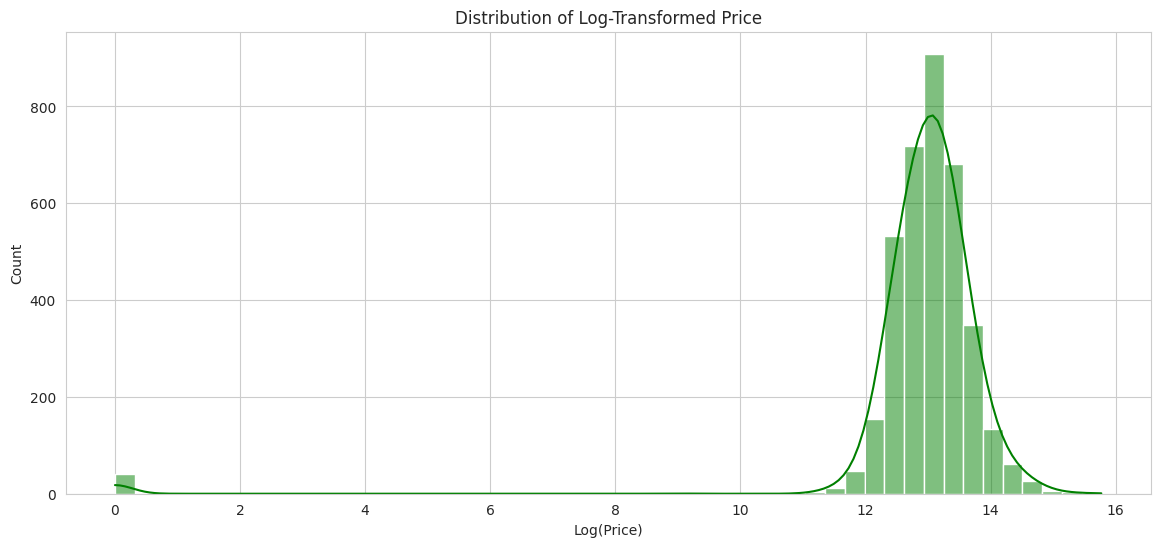

Skewness of Log-Transformed Price: -7.536836855044542


In [35]:
# Apply log transformation to reduce skewness
y_train_log = np.log1p(y_train)

plt.figure(figsize=(14, 6))
sns.histplot(y_train_log, kde=True, bins=50, color='green')
plt.title('Distribution of Log-Transformed Price')
plt.xlabel('Log(Price)')
plt.show()

print(f"Skewness of Log-Transformed Price: {y_train_log.skew()}")

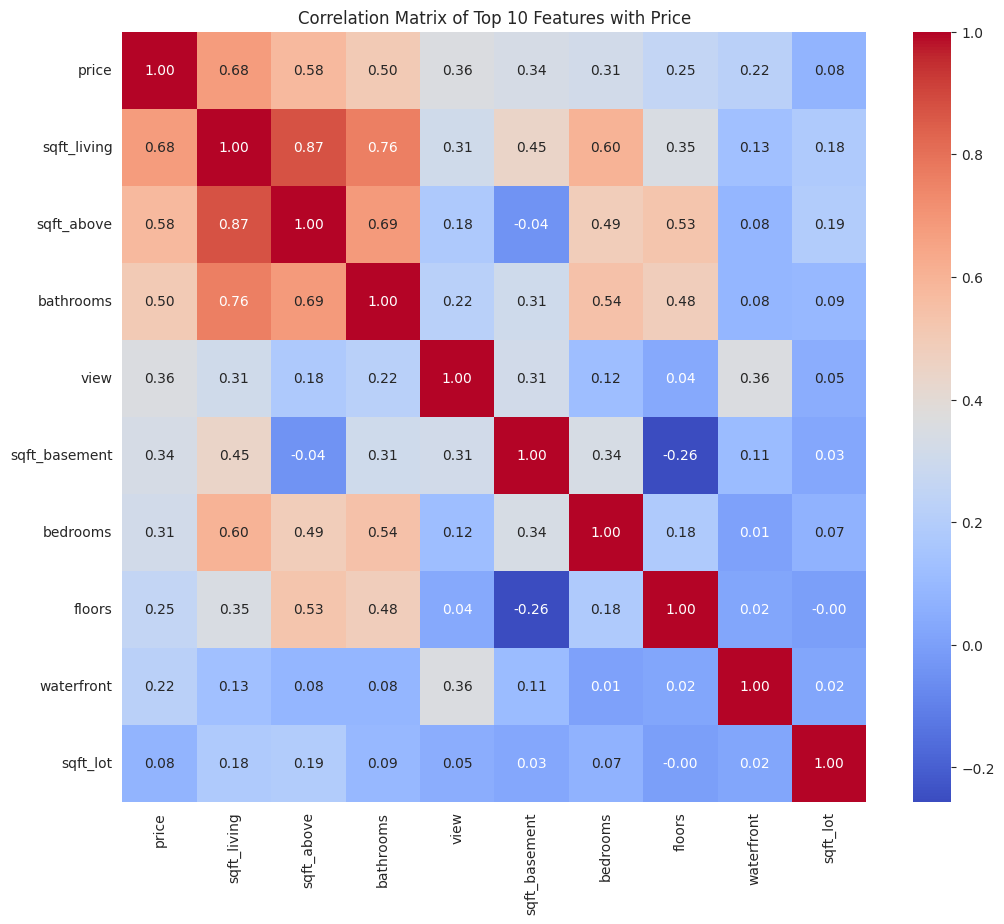

In [36]:
# Combine X_train and y_train for correlation analysis
train_combined = X_train.copy()
train_combined['price'] = y_train

# Find the top 10 features most correlated with price
corrmat = train_combined.corr(numeric_only=True)
top_corr_features = corrmat.nlargest(10, 'price')['price'].index
top_corr_matrix = train_combined[top_corr_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Top 10 Features with Price')
plt.show()

In [38]:
# Combine train and test data for consistent preprocessing
# Drop the target variable from training data before combining
all_data = pd.concat([X_train, X_test], axis=0)

print(f"Combined data shape: {all_data.shape}")

Combined data shape: (4600, 17)


In [39]:
# Find missing values in the current all_data
missing_data = all_data.isna().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]

print("Features with missing values:")
print(missing_data)

Features with missing values:
Series([], dtype: int64)


In [40]:
# Check which columns in your dataset are numerical
numerical_cols = all_data.select_dtypes(include=[np.number]).columns.tolist()

# Find numerical columns with missing values
numerical_cols_with_missing = []
for col in numerical_cols:
    if all_data[col].isna().sum() > 0:
        numerical_cols_with_missing.append(col)

print(f"Numerical columns with missing values: {numerical_cols_with_missing}")

# Impute numerical features with median (more robust than 0)
for col in numerical_cols_with_missing:
    all_data[col] = all_data[col].fillna(all_data[col].median())

print("\nNumerical missing values filled with median.")

Numerical columns with missing values: []

Numerical missing values filled with median.


In [41]:
# Check missing values in numerical columns after imputation
remaining_missing = all_data[numerical_cols].isna().sum()
remaining_missing = remaining_missing[remaining_missing > 0]

if len(remaining_missing) > 0:
    print("Remaining missing values in numerical columns:")
    print(remaining_missing)
else:
    print("All numerical columns have been imputed successfully!")

All numerical columns have been imputed successfully!


In [43]:
# Check the distribution of a column in your dataset
all_data['bedrooms'].value_counts()


,count
bedrooms,
3.0,2032
4.0,1531
2.0,566
5.0,353
6.0,61
1.0,38
7.0,14
0.0,2
8.0,2


In [46]:
# Impute categorical features with 'None' (for features where NA means 'no') or mode (for features where NA means missing data)
categorical_cols_to_impute_none = ['Alley', 'Fence', 'MiscFeature', 'PoolQC', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
for col in categorical_cols_to_impute_none:
    if col in all_data.columns: # Check if column exists after one-hot encoding
        all_data[col] = all_data[col].fillna('None')

for col in ['Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Utilities', 'Functional', 'MSZoning']:
    if col in all_data.columns: # Check if column exists after one-hot encoding
        all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [47]:
# Based on the likely remaining missing values (GarageYrBlt), impute the remaining numerical features.
# GarageYrBlt can be imputed with 0 (assuming 0 means no garage, consistent with GarageArea/Cars=0)
if 'GarageYrBlt' in all_data.columns:
    all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)


print("\nMissing values after all imputation:", all_data.isna().sum().sum())


Missing values after all imputation: 0


In [49]:
# Create features based on YOUR dataset columns

# Total square footage (if you have these columns)
if 'sqft_above' in all_data.columns and 'sqft_basement' in all_data.columns:
    all_data['TotalSF'] = all_data['sqft_above'] + all_data['sqft_basement']
elif 'sqft_living' in all_data.columns:
    # sqft_living might already be the total
    all_data['TotalSF'] = all_data['sqft_living']

# Total bathrooms (your dataset has 'bathrooms' column already)
# No need to create this if it already exists

# Age of the house
if 'date' in all_data.columns and 'yr_built' in all_data.columns:
    # Extract year from date column
    all_data['date'] = pd.to_datetime(all_data['date'])
    all_data['YearSold'] = all_data['date'].dt.year
    all_data['Age'] = all_data['YearSold'] - all_data['yr_built']

# Renovated feature
if 'yr_renovated' in all_data.columns:
    all_data['IsRenovated'] = (all_data['yr_renovated'] > 0).astype(int)

# Price per square foot (useful feature)
if 'sqft_living' in all_data.columns:
    all_data['sqft_ratio'] = all_data['sqft_living'] / all_data['sqft_lot']

print("New features created based on your dataset.")
print(f"Current shape: {all_data.shape}")

New features created based on your dataset.
Current shape: (4600, 22)


In [51]:
# Check the distribution of cities in your dataset
all_data['city'].value_counts()

,count
city,
Seattle,1573
Renton,293
Bellevue,286
Redmond,235
Kirkland,187
Issaquah,187
Kent,185
Auburn,176
Sammamish,175


In [52]:
# Convert any remaining object columns to category type for one-hot encoding
categorical_cols = all_data.select_dtypes(include=['object']).columns
all_data = pd.get_dummies(all_data, columns=categorical_cols, drop_first=True)

print(f"Data shape after encoding: {all_data.shape}")

Data shape after encoding: (4600, 4661)


In [53]:
# Separate the preprocessed data back into training and testing sets
# Remember: we combined X_train and X_test earlier, so split them back
n_train = len(X_train)
n_test = len(X_test)

X_train_processed = all_data[:n_train]
X_test_processed = all_data[n_train:]

# Use the log-transformed target variable we created earlier
y_train_final = y_train_log  # This was created when we did log transformation

# Split the training data for validation
from sklearn.model_selection import train_test_split
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_processed, y_train_final, test_size=0.2, random_state=42
)

print(f"Training set: {X_train_split.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test_processed.shape}")

Training set: (2944, 4661)
Validation set: (736, 4661)
Test set: (920, 4661)


In [60]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Drop datetime columns if they exist
datetime_cols = X_train_split.select_dtypes(include=['datetime64']).columns
if len(datetime_cols) > 0:
    print(f"Dropping datetime columns: {datetime_cols.tolist()}")
    X_train_split = X_train_split.drop(columns=datetime_cols)
    X_val = X_val.drop(columns=datetime_cols)
    X_test_processed = X_test_processed.drop(columns=datetime_cols)

# Ensure all data is numeric and convert to float
X_train_split = X_train_split.astype(float)
X_val = X_val.astype(float)
X_test_processed = X_test_processed.astype(float)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val)
X_test_final_scaled = scaler.transform(X_test_processed)

print("Features scaled successfully!")
print(f"Training set scaled: {X_train_scaled.shape}")
print(f"Validation set scaled: {X_val_scaled.shape}")
print(f"Test set scaled: {X_test_final_scaled.shape}")

Dropping datetime columns: ['date']
Features scaled successfully!
Training set scaled: (2944, 4660)
Validation set scaled: (736, 4660)
Test set scaled: (920, 4660)


In [61]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train_split)
y_pred_lr = lr.predict(X_val_scaled)

print("Linear Regression model trained successfully!")

Linear Regression model trained successfully!


In [62]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(objective='reg:squarederror', # Corrected objective function
                        n_estimators=1000,
                        learning_rate=0.05,
                        max_depth=3,
                        min_child_weight=1,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        random_state=42)

# XGBoost can handle NaNs, but since we've cleaned the data, we can use the scaled data as well if preferred.
# However, XGBoost generally doesn't require scaling. We'll use the unscaled data as it's a tree-based model.
xgbr.fit(X_train_split, y_train_split)
y_pred_xgb = xgbr.predict(X_val)

print("XGBoost model trained successfully!")

XGBoost model trained successfully!


In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"--- {model_name} Performance ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R-squared: {r2:.4f}\n")

# Evaluate both models
evaluate_model(y_val, y_pred_lr, "Linear Regression")
evaluate_model(y_val, y_pred_xgb, "XGBoost")

--- Linear Regression Performance ---
RMSE: 2.2233
MAE:  0.9296
R-squared: -1.3342

--- XGBoost Performance ---
RMSE: 1.3808
MAE:  0.3315
R-squared: 0.0997



In [64]:
# Make predictions on the final test set using the best model (XGBoost)
# Use the unscaled test data for XGBoost prediction
final_predictions_log = xgbr.predict(X_test_processed)

# IMPORTANT: We must reverse the log transformation to get the predictions back on the original price scale
final_predictions = np.expm1(final_predictions_log)

# Create a simple DataFrame with predictions
# Since we don't have original test IDs, we'll create sequential IDs
submission = pd.DataFrame({
    'Id': range(len(final_predictions)),
    'PredictedPrice': final_predictions
})

# Save to csv
submission.to_csv('house_price_predictions.csv', index=False)

print("Prediction file 'house_price_predictions.csv' created successfully.")
print(f"Number of predictions: {len(final_predictions)}")
print(f"\nSample predictions:")
print(submission.head(10))
print(f"\nPrediction statistics:")
print(f"Mean predicted price: ${final_predictions.mean():,.2f}")
print(f"Min predicted price: ${final_predictions.min():,.2f}")
print(f"Max predicted price: ${final_predictions.max():,.2f}")

Prediction file 'house_price_predictions.csv' created successfully.
Number of predictions: 920

Sample predictions:
   Id  PredictedPrice
0   0    412006.46875
1   1    349966.43750
2   2    865503.00000
3   3    413582.34375
4   4    267277.40625
5   5    572909.00000
6   6    470417.71875
7   7    314180.84375
8   8    448008.37500
9   9    584507.87500

Prediction statistics:
Mean predicted price: $506,211.28
Min predicted price: $85.65
Max predicted price: $1,942,399.12


In [65]:
print("Missing values in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("Missing values in X_val_scaled:", np.isnan(X_val_scaled).sum())
print("Missing values in X_test_final_scaled:", np.isnan(X_test_final_scaled).sum())

Missing values in X_train_scaled: 0
Missing values in X_val_scaled: 0
Missing values in X_test_final_scaled: 0


In [66]:
print("Infinite values in X_train_scaled:", np.isinf(X_train_scaled).sum())
print("Infinite values in X_val_scaled:", np.isinf(X_val_scaled).sum())
print("Infinite values in X_test_final_scaled:", np.isinf(X_test_final_scaled).sum())

Infinite values in X_train_scaled: 0
Infinite values in X_val_scaled: 0
Infinite values in X_test_final_scaled: 0
